In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading and reading the data
df = pd.read_excel("Sales.xlsx", sheet_name="Sales")
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


#### Null value check

In [5]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [6]:
# calculate the percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)

missing_value_df = pd.DataFrame({'percent_missing': percent_missing.round(1)})

missing_value_df

,percent_missing
CustID,0.0
AgentBonus,0.0
Age,6.0
CustTenure,5.0
Channel,0.0
Occupation,0.0
EducationField,0.0
Gender,0.0
ExistingProdType,0.0
Designation,0.0


Since there are only a few missing values in some of the columns, I will be dropping the missing values.

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

There seems to be some mismatch with the variable 'Age'. I believe the 'Age' is referring to the person for whom the insurance is being bought, where as the actual customer who is making the purchase seems to be either the parent or a relative. For instance, a customer who's age is said to be 13 has a designation of a manager and their marital status shows divorced with a monthly income of 20,000 rs. This does not make sense for further analysis or model building. Hence, I will be dropping this variable.

In [9]:
# Creating a new dataframe to maintain the orginial dataset as it is.
new_df = df.copy()
new_df.drop('Age', axis=1, inplace=True)

In [10]:
# Dropping the 'CustID' column as it is irrelevant to the analysis
new_df.drop("CustID", axis=1, inplace=True)

In [11]:
# Making a few corrections with some of the inputs given to a few variables
new_df["Occupation"] = new_df["Occupation"].replace("Laarge Business", "Large Business")
new_df["Gender"] = new_df["Gender"].replace("Fe male", "Female")
new_df["EducationField"] = new_df["EducationField"].replace("UG", "Under Graduate")
new_df["EducationField"] = new_df["EducationField"].replace("Engineer", "Graduate")
new_df["EducationField"] = new_df["EducationField"].replace("MBA", "Post Graduate")
new_df["Designation"] = new_df["Designation"].replace("Exe", "Executive")
new_df["MaritalStatus"] = new_df["MaritalStatus"].replace("Unmarried", "Single")

In [12]:
# Creating seperate dataframes for categorial and numerical featrues for easy analysis
df_num = new_df.select_dtypes(include=np.number)
df_cat = new_df.select_dtypes(exclude=np.number)

#### Histogram of Numerical featrues

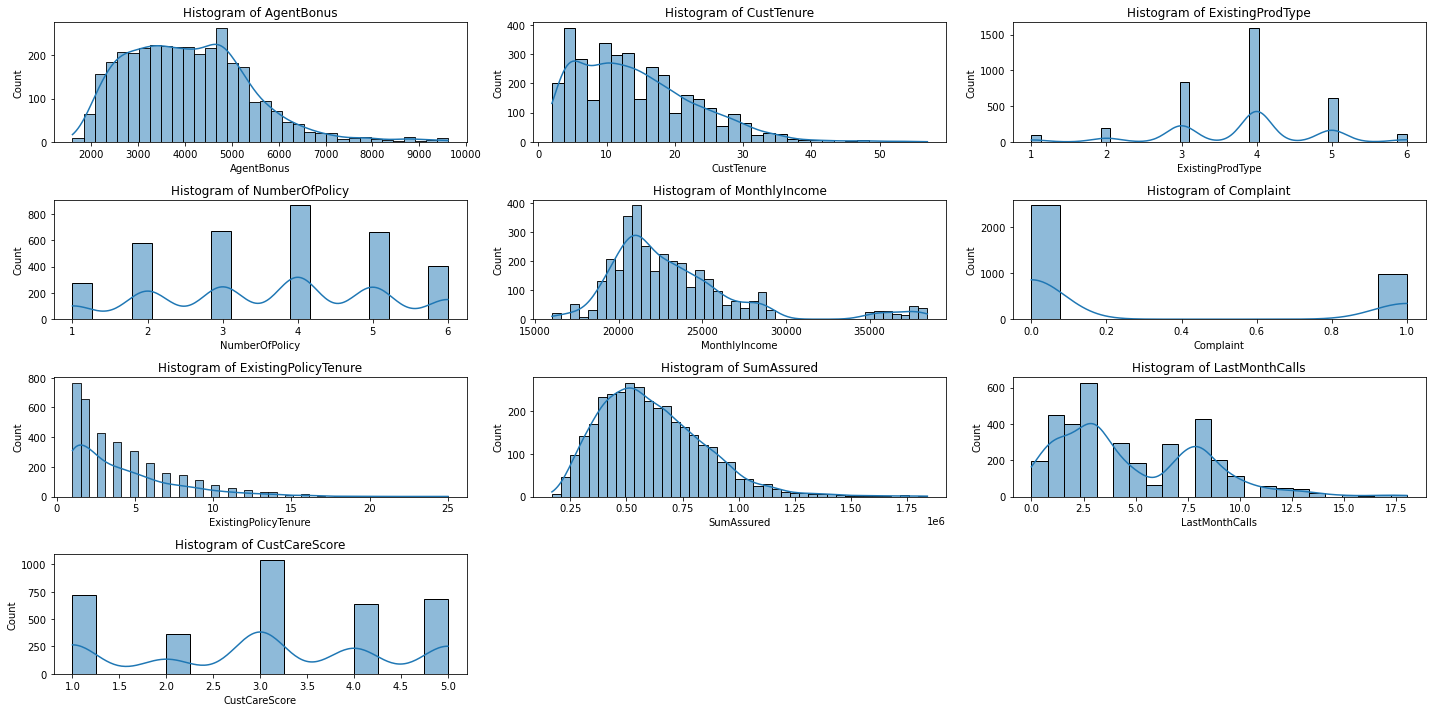

In [13]:
plt.figure(figsize=(20, 10))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 3, i+1)
    sns.histplot(x=df_num[feature_list[i]], data=df_num, kde=True)
    plt.title("Histogram of {}".format(feature_list[i]))
    plt.tight_layout()

#### Boxplot of numerical features

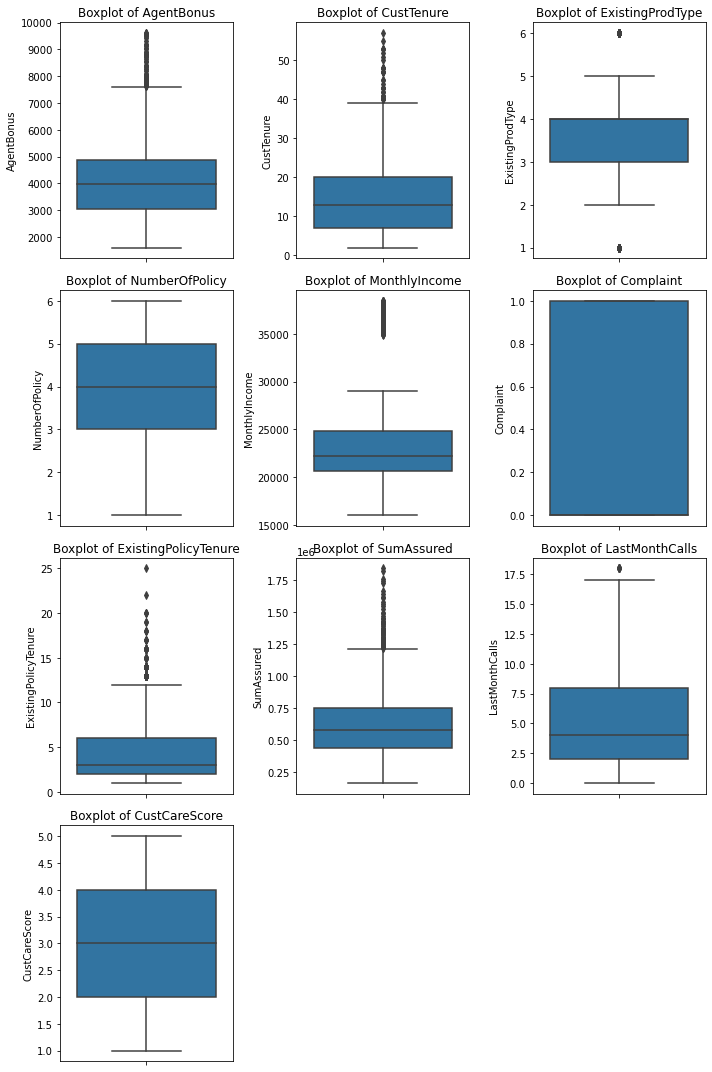

In [14]:
plt.figure(figsize=(10, 15))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df_num[feature_list[i]], data=df_num)
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

In [15]:
def check_outliers(data):
    vData_num = data.loc[:,data.columns != 'class']
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    # checking for outliers, True represents outlier
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers(df)

No. of outliers in Age: 24
No. of outliers in AgentBonus: 60
No. of outliers in CustTenure: 32
No. of outliers in ExistingPolicyTenure: 107
No. of outliers in ExistingProdType: 217
No. of outliers in LastMonthCalls: 9
No. of outliers in MonthlyIncome: 196
No. of outliers in SumAssured: 56


No of attributes with outliers are : 8


<ipython-input-15-4f099a8367c9>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
<ipython-input-15-4f099a8367c9>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))


#### Stats Summary

In [16]:
def central_values(column):
    min_value = df_num[column].min()
    max_value = df_num[column].max()
    mean_value = df_num[column].mean()
    median_value = df_num[column].median()
    std_dv = df_num[column].std()
    range_value = df_num[column].max() - df_num[column].min()
    
    print(f"Central Values for {column}:")
    print(f" MIN: {round(min_value, 2)}")
    print(f" MAX: {round(max_value, 2)}")
    print(f" MEAN: {round(mean_value, 2)}")
    print(f" MEDIAN: {round(median_value, 2)}")
    print(f" STD DEV: {round(std_dv, 2)}")
    print(f" RANGE: {round(range_value, 2)}")
    print()
    print()

In [17]:
for col in df_num:
    central_values(col)

Central Values for AgentBonus:
 MIN: 1605
 MAX: 9608
 MEAN: 4072.11
 MEDIAN: 3975.0
 STD DEV: 1315.18
 RANGE: 8003


Central Values for CustTenure:
 MIN: 2.0
 MAX: 57.0
 MEAN: 14.34
 MEDIAN: 13.0
 STD DEV: 8.69
 RANGE: 55.0


Central Values for ExistingProdType:
 MIN: 1
 MAX: 6
 MEAN: 3.8
 MEDIAN: 4.0
 STD DEV: 1.0
 RANGE: 5


Central Values for NumberOfPolicy:
 MIN: 1.0
 MAX: 6.0
 MEAN: 3.66
 MEDIAN: 4.0
 STD DEV: 1.46
 RANGE: 5.0


Central Values for MonthlyIncome:
 MIN: 16009.0
 MAX: 38456.0
 MEAN: 23294.37
 MEDIAN: 22212.0
 STD DEV: 4218.84
 RANGE: 22447.0


Central Values for Complaint:
 MIN: 0
 MAX: 1
 MEAN: 0.29
 MEDIAN: 0.0
 STD DEV: 0.45
 RANGE: 1


Central Values for ExistingPolicyTenure:
 MIN: 1.0
 MAX: 25.0
 MEAN: 4.2
 MEDIAN: 3.0
 STD DEV: 3.36
 RANGE: 24.0


Central Values for SumAssured:
 MIN: 168536.0
 MAX: 1838496.0
 MEAN: 614579.0
 MEDIAN: 579186.0
 STD DEV: 232735.15
 RANGE: 1669960.0


Central Values for LastMonthCalls:
 MIN: 0
 MAX: 18
 MEAN: 4.79
 MEDIAN: 4.0
 STD

#### Countplot of categorical features

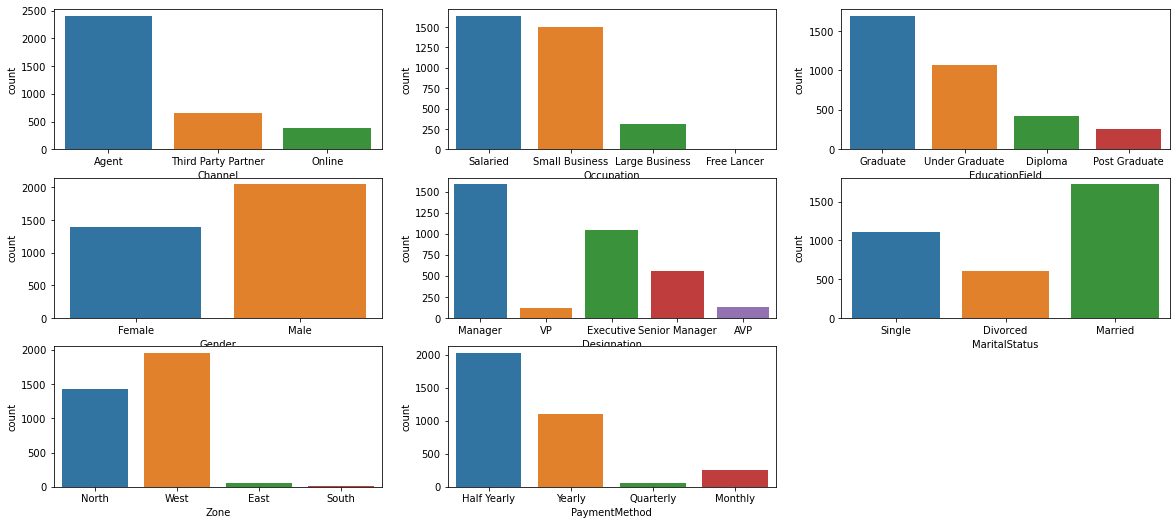

In [72]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_cat.columns):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=df_cat[col], data=df_cat)
    plt.tight_layout

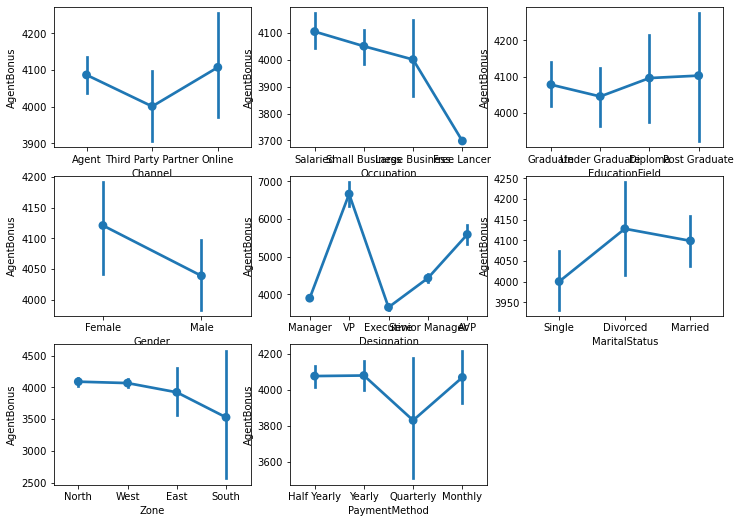

In [73]:
plt.figure(figsize=(12, 15))
for i, col in enumerate(df_cat.columns):
    plt.subplot(5, 3, i+1)
    sns.pointplot(x=df_cat[col], y="AgentBonus", data=new_df)
    plt.tight_layout

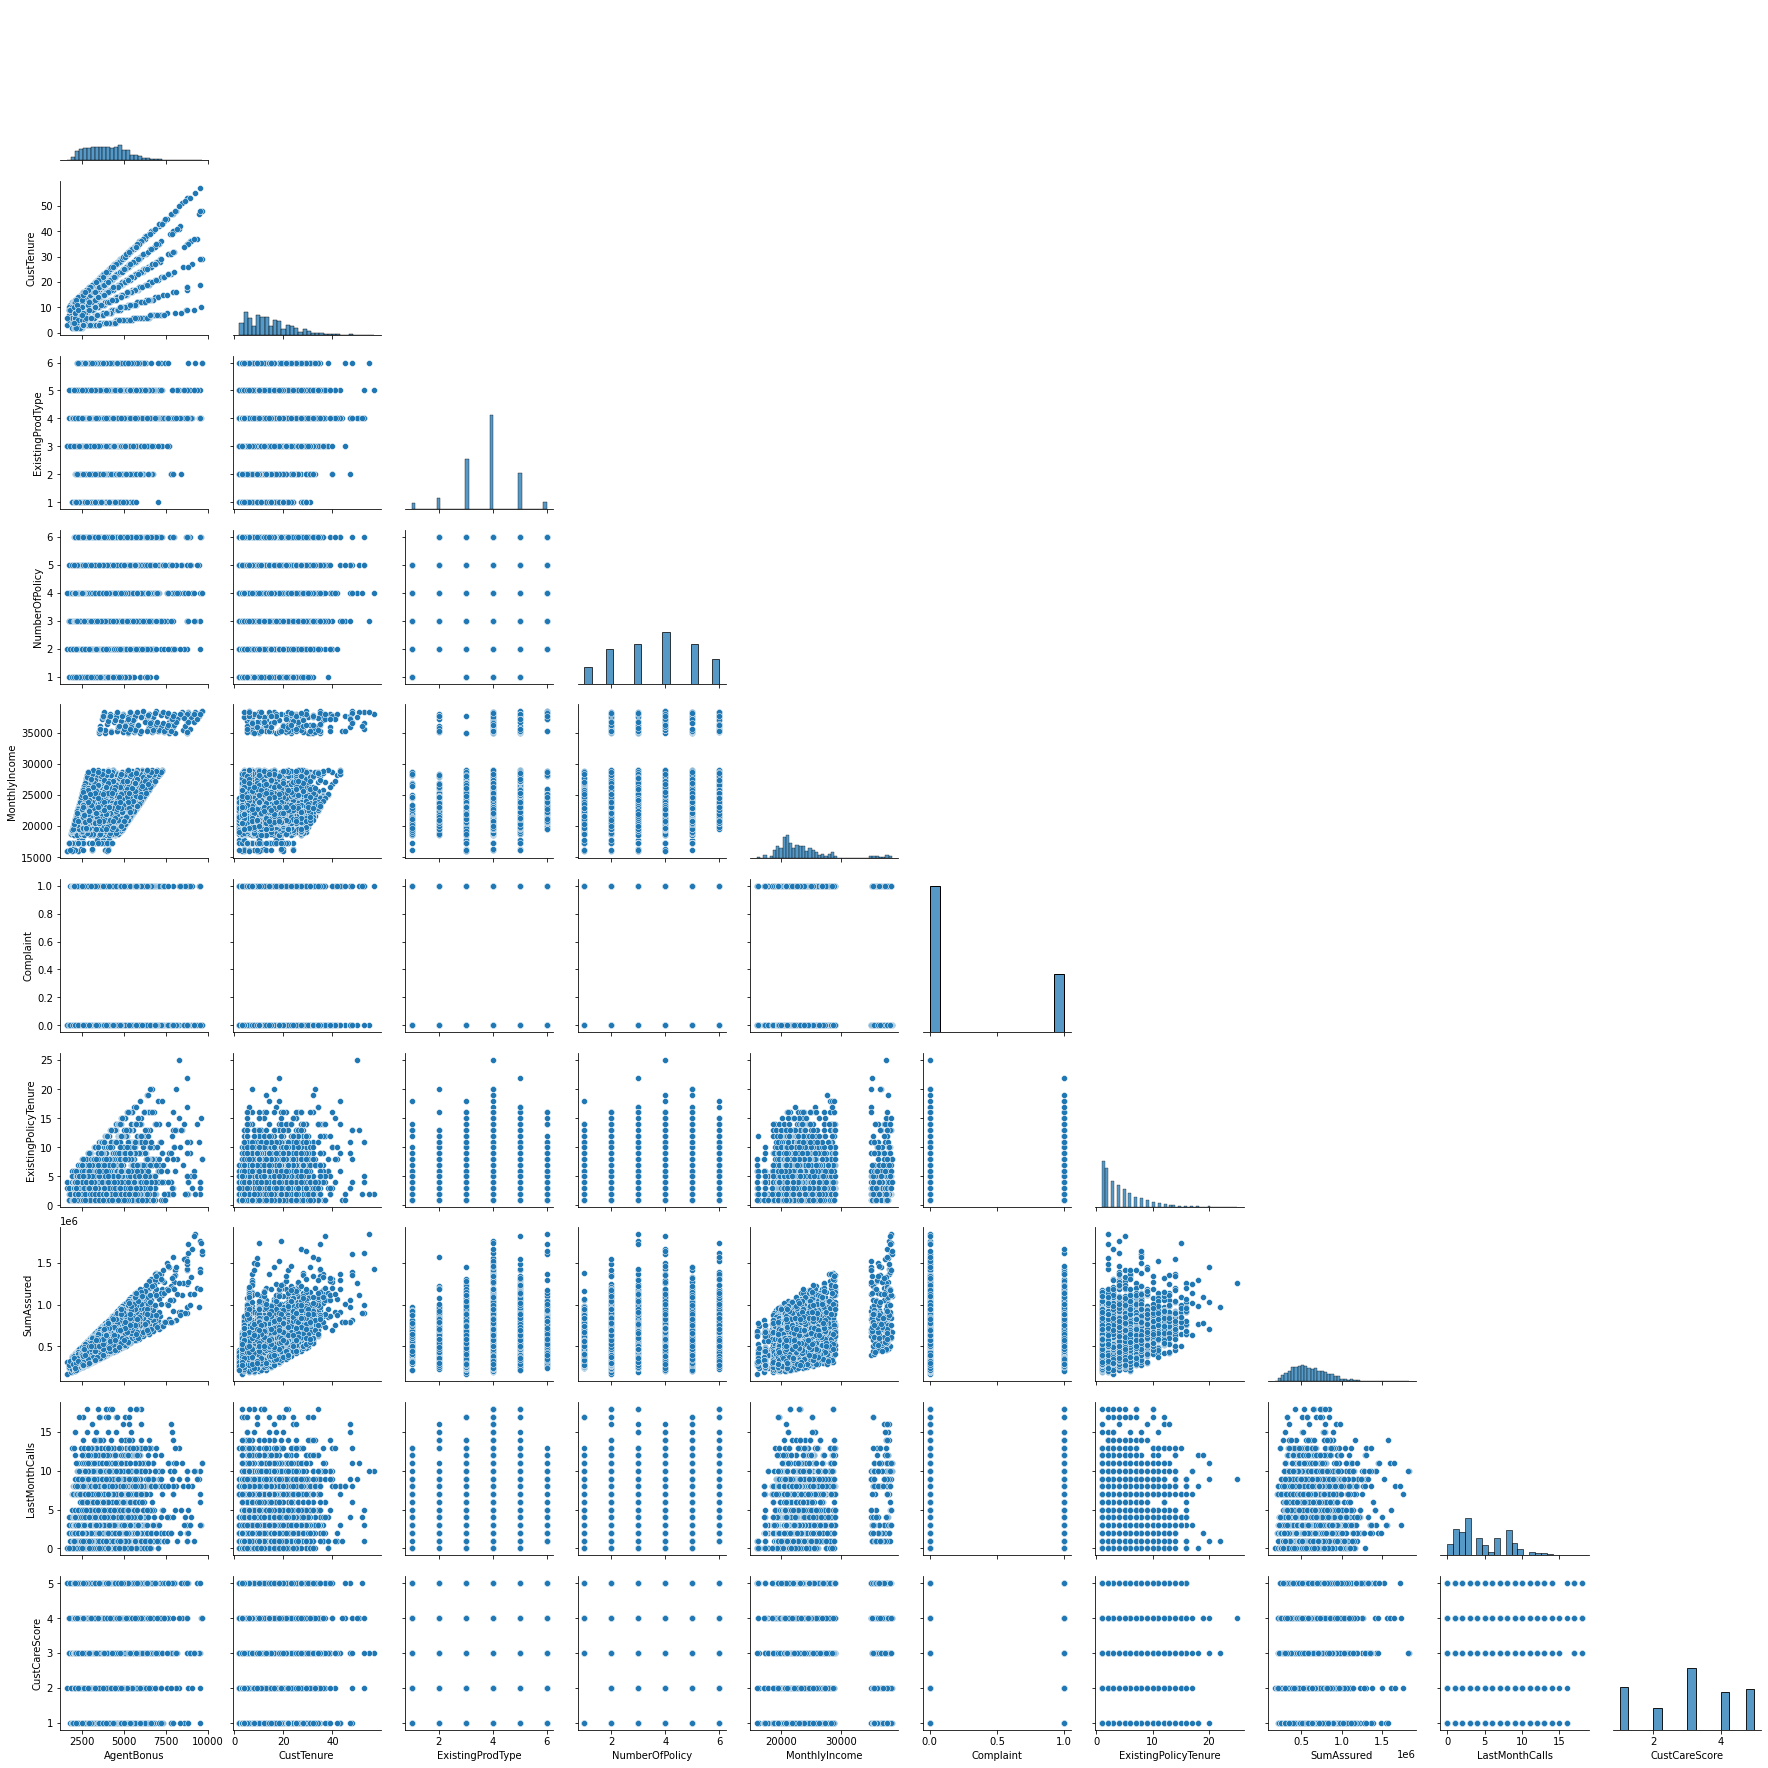

In [20]:
sns.pairplot(new_df, corner=True)

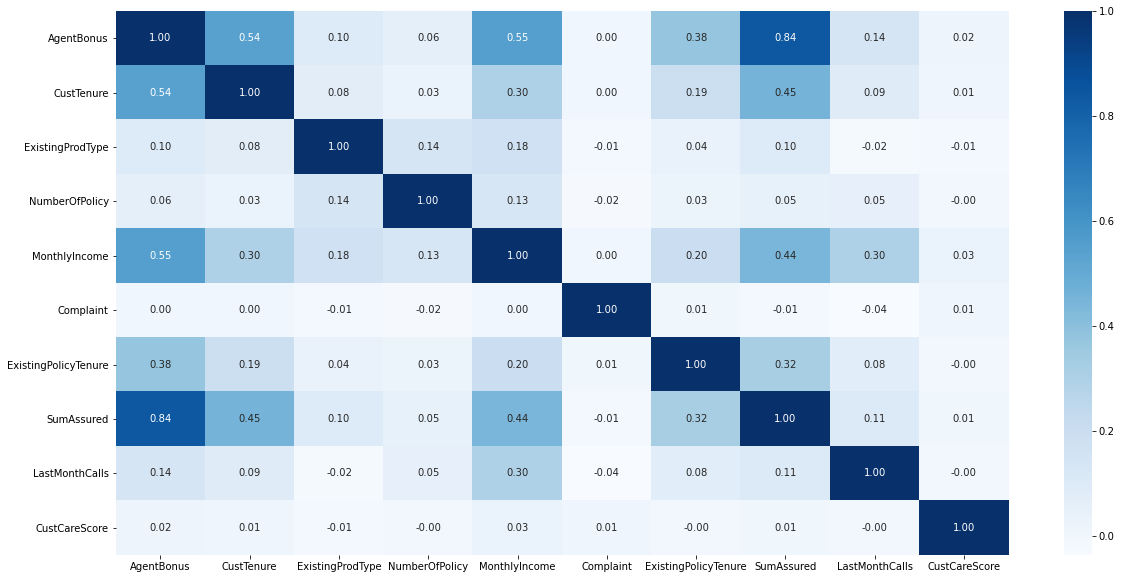

In [21]:
# Plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(new_df.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

In [22]:
from scipy.stats import zscore

new_df_scaled = df_num.apply(zscore)

new_df_scaled.head()

,AgentBonus,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
0,0.256195,-1.190826,-0.798414,-1.137734,-0.545577,1.583228,-0.654834,0.825874,0.059133,-0.764417
1,-1.413026,-1.421076,0.200908,0.234233,-0.750166,-0.631621,-0.357088,-1.375484,0.630888,-0.042712
6,-0.168905,0.996547,0.200908,-0.451750,2.774774,-0.631621,-0.654834,-0.953540,1.202643,-0.764417
7,-1.520252,-1.190826,-0.798414,0.234233,-1.426042,-0.631621,-0.654834,-1.055000,-0.512622,-0.042712
8,-1.028991,-0.384952,0.200908,-0.451750,-0.563831,1.583228,-0.952580,-0.900020,-1.084378,0.678993


In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

link_method = linkage(new_df_scaled, method="average")

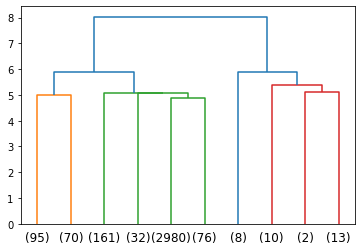

In [24]:
dend = dendrogram(link_method, truncate_mode='lastp', p=10)

In [25]:
link_method2 = linkage(new_df_scaled, method="complete")

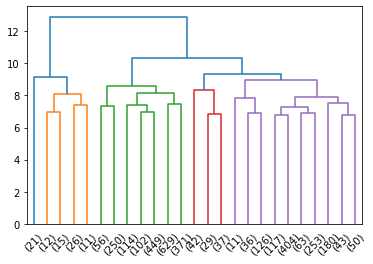

In [26]:
dend = dendrogram(link_method2,
                  truncate_mode="lastp",
                  p = 25)

In [27]:
from scipy.cluster.hierarchy import fcluster

In [28]:
clusters = fcluster(link_method, 4, criterion="maxclust")
clusters

array([2, 2, 1, ..., 2, 2, 2], dtype=int32)

In [29]:
# Adding clusters to their respective rows
df_cluster = df_num.copy()
df_cluster["clusters"] = clusters
df_cluster.head()

,AgentBonus,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,clusters
0,4409,4.0,3,2.0,20993.0,1,2.0,806761.0,5,2.0,2
1,2214,2.0,4,4.0,20130.0,0,3.0,294502.0,7,3.0,2
6,3850,23.0,4,3.0,34999.0,0,2.0,392689.0,9,2.0,1
7,2073,4.0,3,4.0,17279.0,0,2.0,369079.0,3,3.0,2
8,2719,11.0,4,3.0,20916.0,1,1.0,405143.0,1,4.0,2


In [30]:
df_cluster["clusters"].value_counts().sort_index()

1     165
2    3249
3       8
4      25
Name: clusters, dtype: int64

In [31]:
aggdata = df_cluster.groupby("clusters").mean()
aggdata["Freq"] = df_cluster["clusters"].value_counts().sort_index()
aggdata

,AgentBonus,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Freq
clusters,,,,,,,,,,,
1,5979.654545,20.800000,4.242424,4.109091,36478.521212,0.254545,5.109091,8.754587e+05,7.157576,3.436364,165
2,3931.099723,13.800862,3.772238,3.628809,22484.974761,0.285934,4.071407,5.947161e+05,4.639581,3.040628,3249
3,9272.000000,45.250000,5.250000,4.250000,38234.375000,0.375000,4.375000,1.631943e+06,8.875000,3.125000,8
4,8143.720000,32.400000,3.880000,4.360000,36687.120000,0.360000,14.760000,1.148593e+06,7.840000,2.960000,25


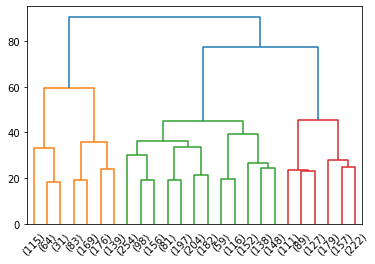

In [32]:
wardlink = linkage(new_df_scaled, method="ward")

dend = dendrogram(wardlink,
                  truncate_mode="lastp",
                  p=25)

In [33]:
ward_clusters = fcluster(wardlink, 4, criterion="maxclust")
ward_clusters

array([4, 3, 1, ..., 3, 3, 3], dtype=int32)

In [34]:
df_cluster["ward_clusters"] = ward_clusters
df_cluster.head()

,AgentBonus,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,clusters,ward_clusters
0,4409,4.0,3,2.0,20993.0,1,2.0,806761.0,5,2.0,2,4
1,2214,2.0,4,4.0,20130.0,0,3.0,294502.0,7,3.0,2,3
6,3850,23.0,4,3.0,34999.0,0,2.0,392689.0,9,2.0,1,1
7,2073,4.0,3,4.0,17279.0,0,2.0,369079.0,3,3.0,2,3
8,2719,11.0,4,3.0,20916.0,1,1.0,405143.0,1,4.0,2,4


In [35]:
aggdata = df_cluster.groupby("ward_clusters").mean()
aggdata["ward_Freq"] = df_cluster["ward_clusters"].value_counts().sort_index()
aggdata

,AgentBonus,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,clusters,ward_Freq
ward_clusters,,,,,,,,,,,,
1,6366.428571,23.114286,4.200000,4.238095,36059.980952,0.238095,6.300000,930815.361905,7.252381,3.380952,1.500000,210
2,5040.918871,20.467372,3.862434,3.716049,23540.492063,0.010582,6.945326,789152.910053,4.603175,2.765432,2.003527,567
3,3554.990476,11.630812,3.707563,3.648179,22079.463866,0.023529,3.084594,531504.010644,4.766947,3.094678,2.000000,1785
4,3949.995480,13.811299,3.847458,3.505085,22557.959322,1.000000,4.189831,595252.230508,4.384181,3.099435,1.995480,885


In [36]:
from sklearn.preprocessing import StandardScaler

scaled_df = new_df.copy()

scaler = StandardScaler()

scaled_df[['MonthlyIncome', 'SumAssured']] = scaler.fit_transform(scaled_df[['MonthlyIncome', 'SumAssured']])

scaled_df.head()

,AgentBonus,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,-0.545577,1,2.0,0.825874,North,Half Yearly,5,2.0
1,2214,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,-0.750166,0,3.0,-1.375484,North,Yearly,7,3.0
6,3850,23.0,Agent,Salaried,Graduate,Male,4,VP,3.0,Divorced,2.774774,0,2.0,-0.953540,North,Yearly,9,2.0
7,2073,4.0,Agent,Small Business,Under Graduate,Female,3,Executive,4.0,Single,-1.426042,0,2.0,-1.055000,West,Half Yearly,3,3.0
8,2719,11.0,Agent,Salaried,Graduate,Male,4,Manager,3.0,Divorced,-0.563831,1,1.0,-0.900020,West,Yearly,1,4.0


#### Encoding categorical variables

In [37]:
for col in df_cat:
    print(f"{col}: {scaled_df[col].unique()}")

Channel: ['Agent' 'Third Party Partner' 'Online']
Occupation: ['Salaried' 'Small Business' 'Large Business' 'Free Lancer']
EducationField: ['Graduate' 'Under Graduate' 'Diploma' 'Post Graduate']
Gender: ['Female' 'Male']
Designation: ['Manager' 'VP' 'Executive' 'Senior Manager' 'AVP']
MaritalStatus: ['Single' 'Divorced' 'Married']
Zone: ['North' 'West' 'East' 'South']
PaymentMethod: ['Half Yearly' 'Yearly' 'Quarterly' 'Monthly']


In [38]:
encoded_df = scaled_df.copy()

A few of the categorical variables needed to be encoded ordinally: Channel, Occupation, EducationField, Designation, MaritalStatus 

In [39]:
# Encoding 'Channel'
encoded_df['Channel']=np.where(encoded_df['Channel'] =='Third Party Partner', '1', encoded_df['Channel'])
encoded_df['Channel']=np.where(encoded_df['Channel'] =='Agent', '2', encoded_df['Channel'])
encoded_df['Channel']=np.where(encoded_df['Channel'] =='Online', '3', encoded_df['Channel'])

encoded_df['Channel'] = encoded_df['Channel'].astype('float64')

# Encoding 'Occupation'
encoded_df['Occupation']=np.where(encoded_df['Occupation'] =='Free Lancer', '1', encoded_df['Occupation'])
encoded_df['Occupation']=np.where(encoded_df['Occupation'] =='Large Business', '2', encoded_df['Occupation'])
encoded_df['Occupation']=np.where(encoded_df['Occupation'] =='Small Business', '3', encoded_df['Occupation'])
encoded_df['Occupation']=np.where(encoded_df['Occupation'] =='Salaried', '4', encoded_df['Occupation'])

encoded_df['Occupation'] = encoded_df['Occupation'].astype('float64')


# Encoding 'EducationField'
encoded_df['EducationField']=np.where(encoded_df['EducationField'] =='Diploma', '1', encoded_df['EducationField'])
encoded_df['EducationField']=np.where(encoded_df['EducationField'] =='Under Graduate', '2', encoded_df['EducationField'])
encoded_df['EducationField']=np.where(encoded_df['EducationField'] =='Graduate', '3', encoded_df['EducationField'])
encoded_df['EducationField']=np.where(encoded_df['EducationField'] =='Post Graduate', '4', encoded_df['EducationField'])

encoded_df['EducationField'] = encoded_df['EducationField'].astype('float64')


# Encoding 'Designation'
encoded_df['Designation']=np.where(encoded_df['Designation'] =='Executive', '1', encoded_df['Designation'])
encoded_df['Designation']=np.where(encoded_df['Designation'] =='Manager', '2', encoded_df['Designation'])
encoded_df['Designation']=np.where(encoded_df['Designation'] =='Senior Manager', '3', encoded_df['Designation'])
encoded_df['Designation']=np.where(encoded_df['Designation'] =='AVP', '4', encoded_df['Designation'])
encoded_df['Designation']=np.where(encoded_df['Designation'] =='VP', '5', encoded_df['Designation'])

encoded_df['Designation'] = encoded_df['Designation'].astype('float64')


# Encoding 'MaritalStatus'
encoded_df['MaritalStatus']=np.where(encoded_df['MaritalStatus'] =='Single', '1', encoded_df['MaritalStatus'])
encoded_df['MaritalStatus']=np.where(encoded_df['MaritalStatus'] =='Married', '2', encoded_df['MaritalStatus'])
encoded_df['MaritalStatus']=np.where(encoded_df['MaritalStatus'] =='Divorced', '3', encoded_df['MaritalStatus'])

encoded_df['MaritalStatus'] = encoded_df['MaritalStatus'].astype('float64')

In [40]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

encoded_df[['Gender', 'Zone', 'PaymentMethod']] = encoder.fit_transform(df[['Gender', 'Zone', 'PaymentMethod']])

In [41]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3447 entries, 0 to 4519
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            3447 non-null   int64  
 1   CustTenure            3447 non-null   float64
 2   Channel               3447 non-null   float64
 3   Occupation            3447 non-null   float64
 4   EducationField        3447 non-null   float64
 5   Gender                3447 non-null   float64
 6   ExistingProdType      3447 non-null   int64  
 7   Designation           3447 non-null   float64
 8   NumberOfPolicy        3447 non-null   float64
 9   MaritalStatus         3447 non-null   float64
 10  MonthlyIncome         3447 non-null   float64
 11  Complaint             3447 non-null   int64  
 12  ExistingPolicyTenure  3447 non-null   float64
 13  SumAssured            3447 non-null   float64
 14  Zone                  3447 non-null   float64
 15  PaymentMethod        

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [43]:
# Splitting the data into train and test sets.

X = encoded_df.drop("AgentBonus", axis=1)

y = encoded_df["AgentBonus"]

#### Splitting the data 70:30

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [45]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Fit the models and calculate the metrics
metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    metrics[name] = {
        'R^2 (train)': r2_score(y_train, y_pred_train),
        'R^2 (test)': r2_score(y_test, y_pred_test),
        'Adjusted R^2 (train)': 1 - (1 - r2_score(y_train, y_pred_train)) * (len(y_train)-1) / (len(y_train)-X_train.shape[1]-1),
        'Adjusted R^2 (test)': 1 - (1 - r2_score(y_test, y_pred_test)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1),
        'MAE (train)': mean_absolute_error(y_train, y_pred_train),
        'MAE (test)': mean_absolute_error(y_test, y_pred_test),
        'MSE (train)': mean_squared_error(y_train, y_pred_train),
        'MSE (test)': mean_squared_error(y_test, y_pred_test),
        'RMSE (train)': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE (test)': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'MAPE (train)': mean_absolute_percentage_error(y_train, y_pred_train),
        'MAPE (test)': mean_absolute_percentage_error(y_test, y_pred_test),
        'MPE (train)': np.mean((y_train - y_pred_train) / y_train) * 100,
        'MPE (test)': np.mean((y_test - y_pred_test) / y_test) * 100
    }

# Convert the metrics to a Pandas DataFrame and display it
model_metrics = pd.DataFrame(metrics).round(2)

model_metrics.head(25)

,Linear Regression,Lasso Regression,Ridge Regression,Elastic Net,Decision Tree,Random Forest
R^2 (train),0.78,0.78,0.78,0.72,1.00,0.97
R^2 (test),0.78,0.78,0.78,0.74,0.66,0.82
Adjusted R^2 (train),0.78,0.78,0.78,0.72,1.00,0.97
Adjusted R^2 (test),0.78,0.78,0.78,0.73,0.65,0.82
MAE (train),488.03,488.05,488.03,550.97,0.00,159.84
MAE (test),510.26,509.84,510.25,557.08,573.91,443.59
MSE (train),372718.63,372748.29,372718.84,463319.51,0.00,43420.10
MSE (test),403239.29,402728.87,403226.06,486835.59,638791.88,326948.69
RMSE (train),610.51,610.53,610.51,680.68,0.00,208.37
RMSE (test),635.01,634.61,635.00,697.74,799.24,571.79


Inference: 

The decision tree and random forest models seem to be over fitting because the training set accuracy is significantly higher than the test set accuracy.

#### Checking for the most important features and their coefficients

In [46]:
# Create a list of linear regression models to evaluate
regression_models = [('Linear Regression', LinearRegression()),
                     ('Elastic Net', ElasticNet()),
          ('Ridge Regression', Ridge()),
          ('Lasso Regression', Lasso())]

# Loop through the models and print the most important features
for name, model in regression_models:
    model.fit(X, y)
    coefs = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
    print(f'\n{name}:')
    print(coefs.head(20))


Linear Regression:
SumAssured              848.917969
MonthlyIncome           270.815528
ExistingPolicyTenure     37.356249
CustTenure               26.066412
Complaint                19.529670
Occupation               12.787524
Zone                     10.559998
CustCareScore             5.987847
PaymentMethod             5.183345
EducationField            2.620143
Gender                    0.898713
Channel                  -1.484981
NumberOfPolicy           -1.619208
Designation              -4.257187
LastMonthCalls           -5.976256
MaritalStatus           -16.898330
ExistingProdType        -27.740424
dtype: float64

Elastic Net:
SumAssured              507.145664
MonthlyIncome           181.086560
Designation              96.548292
ExistingPolicyTenure     59.594294
CustTenure               41.766936
ExistingProdType         12.973626
EducationField           10.595906
Occupation                8.699736
NumberOfPolicy            7.186006
Gender                    5.900237
CustCa

#### Applying ensemble models 

##### Bagging 

In [47]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_validate

In [48]:
regressors = [LinearRegression(), ElasticNet(), Ridge(), Lasso()]

for reg in regressors:
    # Define the bagged regressor with 5 base models
    bagged_reg = BaggingRegressor(reg, n_estimators=5, random_state=2)
    
    # Fit the bagged regressor on the training data
    bagged_reg.fit(X_train, y_train)
    
    # Make predictions on the training and testing data
    y_train_pred = bagged_reg.predict(X_train)
    y_test_pred = bagged_reg.predict(X_test)
    
    # Calculate R-squared, adjusted R-squared, and RMSE on the training data
    r2_train = r2_score(y_train, y_train_pred)
    adj_r2_train = 1 - (1 - r2_train) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Calculate R-squared, adjusted R-squared, and RMSE on the testing data
    r2_test = r2_score(y_test, y_test_pred)
    adj_r2_test = 1 - (1 - r2_test) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Print the metrics for the bagged model with the current regressor
    print(f"{reg.__class__.__name__} Bagging Train R-squared: {r2_train:.2f}, Adjusted R-squared: {adj_r2_train:.2f}, RMSE: {rmse_train:.2f}")
    print(f"{reg.__class__.__name__} Bagging Test R-squared: {r2_test:.2f}, Adjusted R-squared: {adj_r2_test:.2f}, RMSE: {rmse_test:.2f}")

LinearRegression Bagging Train R-squared: 0.78, Adjusted R-squared: 0.77, RMSE: 610.92
LinearRegression Bagging Test R-squared: 0.78, Adjusted R-squared: 0.78, RMSE: 636.07
ElasticNet Bagging Train R-squared: 0.72, Adjusted R-squared: 0.72, RMSE: 681.68
ElasticNet Bagging Test R-squared: 0.74, Adjusted R-squared: 0.73, RMSE: 698.28
Ridge Bagging Train R-squared: 0.78, Adjusted R-squared: 0.77, RMSE: 610.91
Ridge Bagging Test R-squared: 0.78, Adjusted R-squared: 0.78, RMSE: 636.06
Lasso Bagging Train R-squared: 0.78, Adjusted R-squared: 0.77, RMSE: 610.86
Lasso Bagging Test R-squared: 0.78, Adjusted R-squared: 0.78, RMSE: 635.83


Inference: 

The results seems to be very similar to the basic regression models.

##### Boosting

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
for reg in regressors:
    # Define the boosting regressor with 1000 estimators
    boost_reg = GradientBoostingRegressor(n_estimators=1000, random_state=2)
    
    # Fit the boosting regressor on the training data
    boost_reg.fit(X_train, y_train)
    
    # Make predictions on the training and testing data
    y_train_pred = boost_reg.predict(X_train)
    y_test_pred = boost_reg.predict(X_test)
    
    # Calculate R-squared, adjusted R-squared, and RMSE on the training data
    r2_train = r2_score(y_train, y_train_pred)
    adj_r2_train = 1 - (1 - r2_train) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Calculate R-squared, adjusted R-squared, and RMSE on the testing data
    r2_test = r2_score(y_test, y_test_pred)
    adj_r2_test = 1 - (1 - r2_test) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Print the metrics for the boosting model with the current regressor
    print(f"{reg.__class__.__name__} Boosting Train R-squared: {r2_train:.2f}, Adjusted R-squared: {adj_r2_train:.2f}, RMSE: {rmse_train:.2f}")
    print(f"{reg.__class__.__name__} Boosting Test R-squared: {r2_test:.2f}, Adjusted R-squared: {adj_r2_test:.2f}, RMSE: {rmse_test:.2f}")

LinearRegression Boosting Train R-squared: 0.95, Adjusted R-squared: 0.95, RMSE: 294.10
LinearRegression Boosting Test R-squared: 0.80, Adjusted R-squared: 0.80, RMSE: 605.63
ElasticNet Boosting Train R-squared: 0.95, Adjusted R-squared: 0.95, RMSE: 294.10
ElasticNet Boosting Test R-squared: 0.80, Adjusted R-squared: 0.80, RMSE: 605.63
Ridge Boosting Train R-squared: 0.95, Adjusted R-squared: 0.95, RMSE: 294.10
Ridge Boosting Test R-squared: 0.80, Adjusted R-squared: 0.80, RMSE: 605.63
Lasso Boosting Train R-squared: 0.95, Adjusted R-squared: 0.95, RMSE: 294.10
Lasso Boosting Test R-squared: 0.80, Adjusted R-squared: 0.80, RMSE: 605.63


Inference: 

There seems to be over fitting when using the gradient boosting method on the model.

#### Tuning the model by splitting the data 80:20

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [52]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Fit the models and calculate the metrics
metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    metrics[name] = {
        'R^2 (train)': r2_score(y_train, y_pred_train),
        'R^2 (test)': r2_score(y_test, y_pred_test),
        'Adjusted R^2 (train)': 1 - (1 - r2_score(y_train, y_pred_train)) * (len(y_train)-1) / (len(y_train)-X_train.shape[1]-1),
        'Adjusted R^2 (test)': 1 - (1 - r2_score(y_test, y_pred_test)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1),
        'MAE (train)': mean_absolute_error(y_train, y_pred_train),
        'MAE (test)': mean_absolute_error(y_test, y_pred_test),
        'MSE (train)': mean_squared_error(y_train, y_pred_train),
        'MSE (test)': mean_squared_error(y_test, y_pred_test),
        'RMSE (train)': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE (test)': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'MAPE (train)': mean_absolute_percentage_error(y_train, y_pred_train),
        'MAPE (test)': mean_absolute_percentage_error(y_test, y_pred_test),
        'MPE (train)': np.mean((y_train - y_pred_train) / y_train) * 100,
        'MPE (test)': np.mean((y_test - y_pred_test) / y_test) * 100
    }

# Convert the metrics to a Pandas DataFrame and display it
model_metrics = pd.DataFrame(metrics).round(2)

model_metrics.head(25)

,Linear Regression,Lasso Regression,Ridge Regression,Elastic Net,Decision Tree,Random Forest
R^2 (train),0.78,0.78,0.78,0.73,1.00,0.98
R^2 (test),0.77,0.77,0.77,0.72,0.66,0.81
Adjusted R^2 (train),0.78,0.78,0.78,0.73,1.00,0.98
Adjusted R^2 (test),0.76,0.76,0.76,0.71,0.65,0.81
MAE (train),487.28,487.34,487.28,548.28,0.00,157.33
MAE (test),521.05,520.90,521.04,569.95,550.30,446.11
MSE (train),371014.72,371034.13,371014.87,459537.70,0.00,42243.86
MSE (test),423616.72,423391.22,423625.77,514894.09,613471.82,334870.63
RMSE (train),609.11,609.13,609.11,677.89,0.00,205.53
RMSE (test),650.86,650.69,650.87,717.56,783.24,578.68


#### Tuning the model by treating the outliers

In [53]:
# Calculate the IQR for each variable
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers for each variable
outliers = ((new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR)))

# Calculate the percentage of outliers for each variable
outlier_percentage = (outliers.sum() / encoded_df.shape[0]) * 100

# Print the percentage of outliers for each variable
print("Percentage of outliers for each variable:")
print(outlier_percentage.round(2))

Percentage of outliers for each variable:
AgentBonus              1.74
Channel                 0.00
Complaint               0.00
CustCareScore           0.00
CustTenure              0.93
Designation             0.00
EducationField          0.00
ExistingPolicyTenure    3.10
ExistingProdType        6.30
Gender                  0.00
LastMonthCalls          0.26
MaritalStatus           0.00
MonthlyIncome           5.69
NumberOfPolicy          0.00
Occupation              0.00
PaymentMethod           0.00
SumAssured              1.62
Zone                    0.00
dtype: float64


<ipython-input-53-fde3c974ec6b>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR)))
<ipython-input-53-fde3c974ec6b>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR)))


Since I cannot verify the genuinity of the outliers, I will be dropping them to measure the accuracy metrics of the models. 

In [54]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [55]:
for column in X.columns:
    lr,ur=remove_outlier(X[column])
    X[column]=np.where(X[column]>ur,ur,X[column])
    X[column]=np.where(X[column]<lr,lr,X[column])

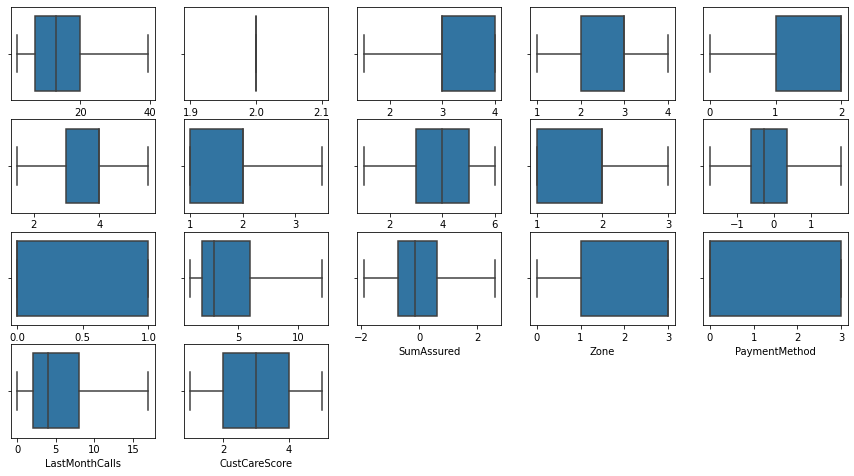

In [56]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(data=X, x=X[col])
    plt.tight_layout

In [57]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Fit the models and calculate the metrics
metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    metrics[name] = {
        'R^2 (train)': r2_score(y_train, y_pred_train),
        'R^2 (test)': r2_score(y_test, y_pred_test),
        'Adjusted R^2 (train)': 1 - (1 - r2_score(y_train, y_pred_train)) * (len(y_train)-1) / (len(y_train)-X_train.shape[1]-1),
        'Adjusted R^2 (test)': 1 - (1 - r2_score(y_test, y_pred_test)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1),
        'MAE (train)': mean_absolute_error(y_train, y_pred_train),
        'MAE (test)': mean_absolute_error(y_test, y_pred_test),
        'MSE (train)': mean_squared_error(y_train, y_pred_train),
        'MSE (test)': mean_squared_error(y_test, y_pred_test),
        'RMSE (train)': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE (test)': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'MAPE (train)': mean_absolute_percentage_error(y_train, y_pred_train),
        'MAPE (test)': mean_absolute_percentage_error(y_test, y_pred_test),
        'MPE (train)': np.mean((y_train - y_pred_train) / y_train) * 100,
        'MPE (test)': np.mean((y_test - y_pred_test) / y_test) * 100
    }

# Convert the metrics to a Pandas DataFrame and display it
model_metrics = pd.DataFrame(metrics).round(2)

model_metrics.head(25)

,Linear Regression,Lasso Regression,Ridge Regression,Elastic Net,Decision Tree,Random Forest
R^2 (train),0.78,0.78,0.78,0.73,1.00,0.98
R^2 (test),0.77,0.77,0.77,0.72,0.64,0.81
Adjusted R^2 (train),0.78,0.78,0.78,0.73,1.00,0.98
Adjusted R^2 (test),0.76,0.76,0.76,0.71,0.63,0.81
MAE (train),487.28,487.34,487.28,548.28,0.00,157.01
MAE (test),521.05,520.90,521.04,569.95,567.02,448.61
MSE (train),371014.72,371034.13,371014.87,459537.70,0.00,42170.30
MSE (test),423616.72,423391.22,423625.77,514894.09,652216.51,336756.75
RMSE (train),609.11,609.13,609.11,677.89,0.00,205.35
RMSE (test),650.86,650.69,650.87,717.56,807.60,580.31


Inference: 

There is no improvement of the models after remvoing the outliers. 

We can conclude the basic models have performed the best.

#### Checking the most important features and their coefficients 

In [58]:
# Create a list of linear regression models to evaluate
regression_models = [('Linear Regression', LinearRegression()),
                     ('Lasso Regressoin', Lasso()),
          ('Ridge Regression', Ridge()),
          ('Elastic Net', ElasticNet())]

# Loop through the models and print the most important features
for name, model in regression_models:
    model.fit(X, y)
    coefs = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False).round(2)
    print(f'\n{name}:')
    print(coefs.head(20))


Linear Regression:
SumAssured              888.87
MonthlyIncome           356.86
ExistingPolicyTenure     37.99
CustTenure               26.66
Occupation               13.94
Complaint                12.40
Zone                     10.01
CustCareScore             8.00
EducationField            6.53
PaymentMethod             5.11
Channel                   0.00
NumberOfPolicy           -1.67
LastMonthCalls           -5.73
Gender                   -5.89
Designation              -7.93
MaritalStatus            -8.48
ExistingProdType        -28.06
dtype: float64

Lasso Regressoin:
SumAssured              888.17
MonthlyIncome           347.48
ExistingPolicyTenure     38.02
CustTenure               26.71
Occupation               12.02
Zone                      9.01
Complaint                 8.13
CustCareScore             7.48
EducationField            5.90
PaymentMethod             3.13
Channel                   0.00
Designation              -0.00
NumberOfPolicy           -0.89
Gender          

#### Checking the performance of the model by splitting 70:30 with outliers treated

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [60]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Fit the models and calculate the metrics
metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    metrics[name] = {
        'R^2 (train)': r2_score(y_train, y_pred_train),
        'R^2 (test)': r2_score(y_test, y_pred_test),
        'Adjusted R^2 (train)': 1 - (1 - r2_score(y_train, y_pred_train)) * (len(y_train)-1) / (len(y_train)-X_train.shape[1]-1),
        'Adjusted R^2 (test)': 1 - (1 - r2_score(y_test, y_pred_test)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1),
        'MAE (train)': mean_absolute_error(y_train, y_pred_train),
        'MAE (test)': mean_absolute_error(y_test, y_pred_test),
        'MSE (train)': mean_squared_error(y_train, y_pred_train),
        'MSE (test)': mean_squared_error(y_test, y_pred_test),
        'RMSE (train)': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE (test)': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'MAPE (train)': mean_absolute_percentage_error(y_train, y_pred_train),
        'MAPE (test)': mean_absolute_percentage_error(y_test, y_pred_test),
        'MPE (train)': np.mean((y_train - y_pred_train) / y_train) * 100,
        'MPE (test)': np.mean((y_test - y_pred_test) / y_test) * 100
    }

# Convert the metrics to a Pandas DataFrame and display it
model_metrics = pd.DataFrame(metrics).round(2)

model_metrics.head(25)

,Linear Regression,Lasso Regression,Ridge Regression,Elastic Net,Decision Tree,Random Forest
R^2 (train),0.77,0.77,0.77,0.70,1.00,0.97
R^2 (test),0.77,0.77,0.77,0.71,0.65,0.82
Adjusted R^2 (train),0.76,0.76,0.76,0.70,1.00,0.97
Adjusted R^2 (test),0.76,0.76,0.76,0.71,0.65,0.82
MAE (train),496.57,496.59,496.56,561.15,0.00,158.66
MAE (test),523.54,523.14,523.51,571.28,574.43,444.44
MSE (train),390838.58,390865.54,390838.87,496827.57,0.00,43275.17
MSE (test),432720.75,432188.87,432708.54,534969.69,647466.59,331335.15
RMSE (train),625.17,625.19,625.17,704.86,0.00,208.03
RMSE (test),657.82,657.41,657.81,731.42,804.65,575.62


### Conclusion

The best fit model is the 80:20 split with the outliers treated.